# Unicorn Companies
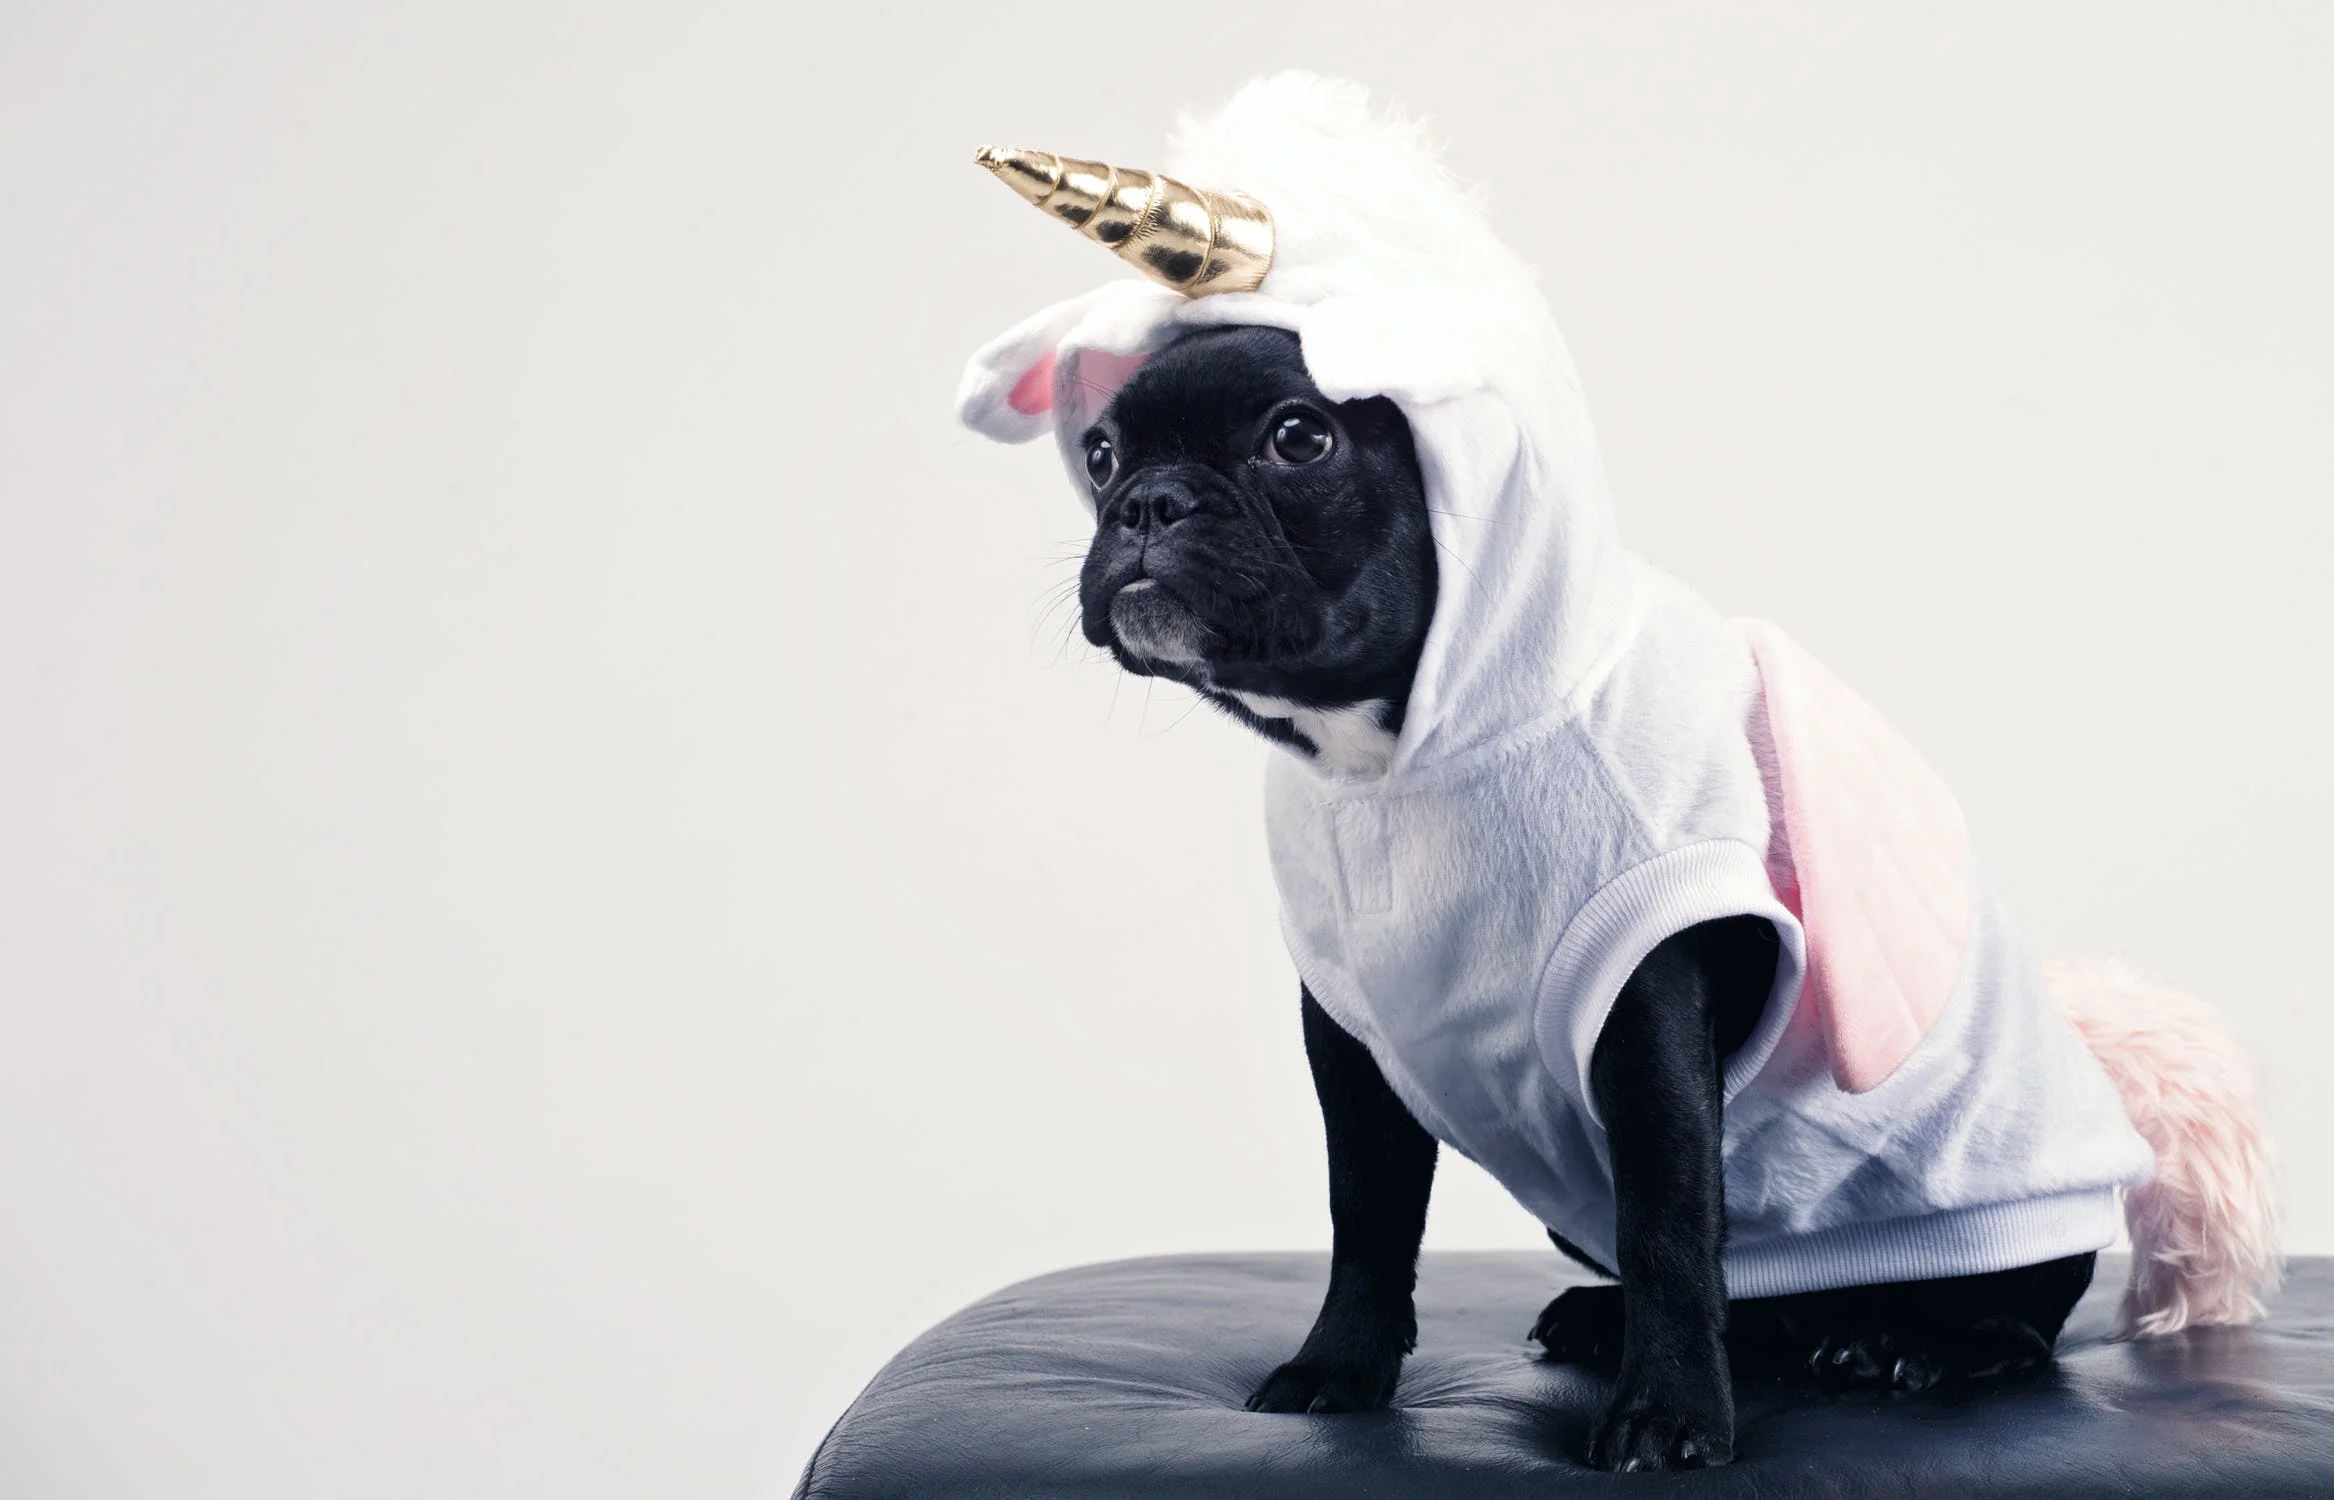

Private companies with a valuation over $1 billion as of March 2022, including each company's current valuation, funding, country of origin, industry, select investors, and the years they were founded and became unicorns. 
>Data acquired from [Maven Analytics](https://www.mavenanalytics.io/data-playground?tags=57i7XlW6LkVTbF7n5UYhhS)

## Importing the data

In [1]:
# bringing in libraries
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('unicorn_data/unicorn_data.csv')
df.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


## First Look

In [3]:
df.head(1)

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."


### Data Dictionary
Field | Description | Notes
:-- | :-- | :--
Company | Company name
Valuation | Company valuation in billions (B) of dollars | remove `$` and `B`
Date Joined | The date in which the company reached $1 billion in valuation
Industry | Company industry
City | City the company was founded in
Country | Country the company was founded in
Continent | Continent the company was founded in
Year Founded | Year the company was founded
Funding | Total amount raised across all funding rounds in billions (B) or millions (M) of dollars | remove `$` and `B`
Select Investors | Top 4 investing firms or individual investors (some have less than 4)

### Other notes...
- Column names need to be lowercased, and spaces in between words need to be changed to `_`
- `Select Investors` column probably has multiple values..

In [4]:
# looking at Select Investors columns for first entry
print((df['Select Investors'][0]))
print(type(df['Select Investors'][0]))

Sequoia Capital China, SIG Asia Investments, Sina Weibo, Softbank Group
<class 'str'>


...`Select Investors` column does have multiple values and is currently a string. Should make this column a list for accessing for additional info later
- Also want to look at dtypes

In [5]:
df.dtypes

Company             object
Valuation           object
Date Joined         object
Industry            object
City                object
Country             object
Continent           object
Year Founded         int64
Funding             object
Select Investors    object
dtype: object

## Data cleaning
1. lowercase and remove inner spacing from column names
2. `valuation` and `funding` 
    - remove `$` and `B`
    - change to float dtype
 
3. `date_joined` should be date dtype
4. (maybe later) change `select_investors` from string to list of strings

In [6]:
# 1a. lowercaseing column names
df.columns = df.columns.str.lower()

df.head(2)

,company,valuation,date joined,industry,city,country,continent,year founded,funding,select investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."


In [7]:
# 1b. replacing inner column spacing with _
df.rename(columns = {'date joined':'date_joined', 
                     'year founded':'year_founded',
                     'select investors':'select_investors'}, inplace = True)

df.head()

,company,valuation,date_joined,industry,city,country,continent,year_founded,funding,select_investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


In [8]:
# 2. removing $ and B from valuation and funding and changing dtype to float

# initalizing list
new_valuation = []

# for loop to populate list
for value in df.valuation:
    new_valuation.append(float(value.replace('$', '').replace('B', '')))

# replacing current series with new series of float numbers
df.valuation = new_valuation


In [9]:
df.funding

0         $8B
1         $7B
2         $2B
3         $2B
4         $4B
        ...  
1069    $379M
1070    $990M
1071     $80M
1072    $792M
1073    $620M
Name: funding, Length: 1074, dtype: object

In [10]:
# initalizing list
new_funding = []

# for loop to populate list
for funding in df.funding:
    new_funding.append((funding.replace('$', '').replace('B', '').replace('M', '')))
                       
new_funding

['8',
 '7',
 '2',
 '2',
 '4',
 '572',
 '2',
 '3',
 '14',
 '3',
 '2',
 '7',
 '2',
 '4',
 '2',
 '4',
 '5',
 '918',
 '476',
 '4',
 '770',
 '979',
 '721',
 '3',
 '490',
 '734',
 '2',
 '427',
 '400',
 '4',
 '4',
 '1',
 '1',
 '1',
 '2',
 '799',
 '765',
 '800',
 '5',
 '376',
 '1',
 '5',
 '558',
 '5',
 '1',
 '1',
 '3',
 '294',
 '3',
 '572',
 '1',
 '564',
 '4',
 '1',
 '333',
 '691',
 '2',
 '343',
 '1',
 '497',
 '2',
 '71',
 '2',
 '1',
 '2',
 '1',
 '2',
 '2',
 '679',
 '770',
 '775',
 '2',
 '105',
 '1',
 '742',
 '607',
 '2',
 '549',
 '1',
 '1',
 '660',
 '820',
 '1',
 '2',
 '297',
 '1',
 '2',
 '922',
 '863',
 '4',
 '447',
 '1',
 '844',
 '2',
 '603',
 '583',
 '912',
 '920',
 '849',
 '424',
 '660',
 '1',
 '645',
 '2',
 '1',
 '3',
 '802',
 '629',
 '448',
 '928',
 '815',
 '728',
 '433',
 '1',
 '891',
 '1',
 '524',
 '803',
 '1',
 '415',
 '587',
 '1',
 '826',
 '910',
 '412',
 '405',
 '729',
 '600',
 '869',
 '187',
 '1',
 '943',
 '514',
 '492',
 '1',
 '644',
 '1',
 '562',
 '286',
 '943',
 '691',
 '559',


### Some of the rows have `Unknown` for funding

In [11]:
# looking at rows with unknown funding
df[df.funding == 'Unknown']

,company,valuation,date_joined,industry,city,country,continent,year_founded,funding,select_investors
215,SSENSE,4.0,2021-06-08,E-commerce & direct-to-consumer,Montreal,Canada,North America,2003,Unknown,Sequoia Capital
424,Uplight,2.0,2021-03-03,Other,Boulder,United States,North America,2019,Unknown,"Rubicon Technology Partners, Max Ventures, Inc..."
567,ISN,2.0,2020-12-17,"Supply chain, logistics, & delivery",Dallas,United States,North America,2001,Unknown,Blackstone
639,SITECH DEV,1.0,2019-05-16,Other,Guiyang,China,Asia,2017,Unknown,China Prosperity Capital
651,Xiaobing,1.0,2021-07-12,Fintech,Beijing,China,Asia,2020,Unknown,"NetEase Capital, Northern Light Venture Capita..."
717,Veepee,1.0,2007-07-02,E-commerce & direct-to-consumer,La Plaine Saint-Denis,France,Europe,2001,Unknown,"Summit Partners, Qatar Holding"
733,DistroKid,1.0,2021-08-16,Internet software & services,New York,United States,North America,2013,Unknown,"Insight Partners, Silversmith Capital Partners..."
866,Assembly,1.0,2021-09-21,Internet software & services,Culver City,United States,North America,2019,Unknown,"Advent International, PSG, Providence Equity P..."
890,Carson Group,1.0,2021-07-14,Fintech,Lincoln,United States,North America,2012,Unknown,Bain Capital
945,Iodine Software,1.0,2021-12-01,Data management & analytics,Austin,United States,North America,2010,Unknown,"Advent International, Bain Capital Ventures, S..."


...for now will drop these so I can rerun for loop and convert values to float

In [12]:
# dropping unknowns for funding
df = df[df.funding != 'Unknown']

# verifying dropped from df
df[df.funding == 'Unknown']

,company,valuation,date_joined,industry,city,country,continent,year_founded,funding,select_investors


In [13]:
# rerunning for loop...

# initalizing list
new_funding = []

# for loop to populate list
for funding in df.funding:
    new_funding.append(float(funding.replace('$', '').replace('B', '').replace('M', '')))
   
# replacing object series with list of floats
df.funding = new_funding

df.funding

0         8.0
1         7.0
2         2.0
3         2.0
4         4.0
        ...  
1069    379.0
1070    990.0
1071     80.0
1072    792.0
1073    620.0
Name: funding, Length: 1062, dtype: float64

In [14]:
# verifying update
df.valuation.dtype

dtype('float64')

In [15]:
df.funding.dtype

dtype('float64')

In [16]:
# 3. changing date joined to date dtype
df.date_joined = pd.to_datetime(df.date_joined)

In [17]:
# verifying update
df.date_joined.dtype

dtype('<M8[ns]')

In [18]:
# last check of columns and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1062 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   company           1062 non-null   object        
 1   valuation         1062 non-null   float64       
 2   date_joined       1062 non-null   datetime64[ns]
 3   industry          1062 non-null   object        
 4   city              1046 non-null   object        
 5   country           1062 non-null   object        
 6   continent         1062 non-null   object        
 7   year_founded      1062 non-null   int64         
 8   funding           1062 non-null   float64       
 9   select_investors  1061 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 91.3+ KB


Data looks good, but need to look into nulls..

In [19]:
# df.isna().sum() 
df.isna().sum()/df.shape[0]

company             0.000000
valuation           0.000000
date_joined         0.000000
industry            0.000000
city                0.015066
country             0.000000
continent           0.000000
year_founded        0.000000
funding             0.000000
select_investors    0.000942
dtype: float64

Null values are < 1% of the data... want to look at rows with null values

In [20]:
# looking at rows where city is null
df[df.city.isna() == True]

,company,valuation,date_joined,industry,city,country,continent,year_founded,funding,select_investors
12,FTX,32.0,2021-07-20,Fintech,NaN,Bahamas,North America,2018,2.0,"Sequoia Capital, Thoma Bravo, Softbank"
170,HyalRoute,4.0,2020-05-26,Mobile & telecommunications,NaN,Singapore,Asia,2015,263.0,Kuang-Chi
242,Moglix,3.0,2021-05-17,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2015,471.0,"Jungle Ventures, Accel, Venture Highway"
251,Trax,3.0,2019-07-22,Artificial intelligence,NaN,Singapore,Asia,2010,1.0,"Hopu Investment Management, Boyu Capital, DC T..."
325,Amber Group,3.0,2021-06-21,Fintech,NaN,Hong Kong,Asia,2015,328.0,"Tiger Global Management, Tiger Brokers, DCM Ve..."
382,Ninja Van,2.0,2021-09-27,"Supply chain, logistics, & delivery",NaN,Singapore,Asia,2014,975.0,"B Capital Group, Monk's Hill Ventures, Dynamic..."
541,Advance Intelligence Group,2.0,2021-09-23,Artificial intelligence,NaN,Singapore,Asia,2016,536.0,"Vision Plus Capital, GSR Ventures, ZhenFund"
811,Carousell,1.0,2021-09-15,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2012,288.0,"500 Global, Rakuten Ventures, Golden Gate Vent..."
848,Matrixport,1.0,2021-06-01,Fintech,NaN,Singapore,Asia,2019,100.0,"Dragonfly Captial, Qiming Venture Partners, DS..."
880,bolttech,1.0,2021-07-01,Fintech,NaN,Singapore,Asia,2018,210.0,"Mundi Ventures, Doqling Capital Partners, Acti..."


In [21]:
# looking at select contry --> Hong Kong that had some null cities
df[(df.country == 'Hong Kong')]

,company,valuation,date_joined,industry,city,country,continent,year_founded,funding,select_investors
56,Lalamove,10.0,2019-02-21,"Supply chain, logistics, & delivery",Cheung Sha Wan,Hong Kong,Asia,2013,2.0,"MindWorks Ventures, Shunwei Capital Partners, ..."
325,Amber Group,3.0,2021-06-21,Fintech,NaN,Hong Kong,Asia,2015,328.0,"Tiger Global Management, Tiger Brokers, DCM Ve..."
595,Trendy Group International,2.0,2012-02-13,Consumer & retail,Kowloon,Hong Kong,Asia,1999,200.0,L Capital Partners
720,Klook,1.0,2018-08-07,Travel,Central,Hong Kong,Asia,2014,722.0,"Sequoia Capital China, Goldman Sachs, Matrix P..."
893,Cider,1.0,2021-09-02,E-commerce & direct-to-consumer,NaN,Hong Kong,Asia,2020,140.0,"Andreessen Horowitz, DST Global, IDG Capital"
1061,WeLab,1.0,2017-11-08,Fintech,NaN,Hong Kong,Asia,2013,871.0,"Sequoia Capital China, ING, Alibaba Entreprene..."


This is not dependent on country *Hong Kong has some cities with values and some without* even though this is a small percentage of total data, it is enough of the subset where I do not want to drop them. For now I will just change the null values to say no_city

In [22]:
# replacing Nulls with no_city
df.city.fillna('no_city', inplace = True)

In [23]:
# verifying nulls removed from col
df.city.isna().sum()

0

In [24]:
# looking at select investor nulls
df[df.select_investors.isna() == True]

,company,valuation,date_joined,industry,city,country,continent,year_founded,funding,select_investors
629,LinkSure Network,1.0,2015-01-01,Mobile & telecommunications,Shanghai,China,Asia,2013,52.0,NaN


### After doing some [research](https://www.cbinsights.com/company/linksure-network/financials)...
'LinkSure Network' investors:
- Haitong Kaiyuan Investment, 
- Northern Light Venture Capital, 
- and Undisclosed Investors

In [25]:
# changing value
df.select_investors[629] = 'Haitong Kaiyuan Investment, Northern Light Venture Capital, and Undisclosed Investors'

<ipython-input-25-29abb2287547>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.select_investors[629] = 'Haitong Kaiyuan Investment, Northern Light Venture Capital, and Undisclosed Investors'


In [26]:
# verifying
df.select_investors[629]

'Haitong Kaiyuan Investment, Northern Light Venture Capital, and Undisclosed Investors'

In [27]:
# verifying all nulls taken care of ...
df.isna().sum().sum()

0

In [28]:
df.head()

,company,valuation,date_joined,industry,city,country,continent,year_founded,funding,select_investors
0,Bytedance,180.0,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,8.0,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,100.0,2012-12-01,Other,Hawthorne,United States,North America,2002,7.0,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,100.0,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,2.0,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,95.0,2014-01-23,Fintech,San Francisco,United States,North America,2010,2.0,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,46.0,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,4.0,"Institutional Venture Partners, Sequoia Capita..."


### Initial Questions
1. What are the distributions of:
    - Valuations
    - Dates joined
    - Years founded
    - Funding

2. What _________ are most and least represented?
    - industries
    - continents
    - countries
    - cities
    
3. What (a)comapnies/(b)years/(c)industries/(d)months had the (i)highest and (ii)lowest total funding
4. What (a)comapnies/(b)years/(c)industries/(d)months had the (i)highest and (ii)lowest average funding
5. What (a)comapnies/(b)years/(c)industries/(d)months had the (i)highest and (ii)lowest total valuation
6. What (a)comapnies/(b)years/(c)industries/(d)months had the (i)highest and (ii)lowest average valuation